In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
df = pd.read_csv("Heart Disease Cleveland.csv")

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

1. Age: Patients Age in years (Numeric)
2. Sex: Gender (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term categorized into 4 category. 0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal)
14. target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check cardinality
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
# Rename the features
df = df.rename(
    columns = {
        'cp': 'Chest pain type',
        'trestbps': 'Resting blood pressure',
        'chol': 'Cholesterol',
        'fbs': 'Fasting blood sugar',
        'restecg': 'Rest electrocardiographic',
        'thalach': 'Maximum heart rate',
        'exang': 'Exercise induced angina',
        'oldpeak': 'ST depression',
        'slope': 'ST slope',
        'ca':'Number of major vessels',
        'thal': 'Thallium heart scan',
        'target':'Heart disease'
    },
    errors = "raise"
)

In [13]:
df.head()

age  sex  Chest pain type  Resting blood pressure  Cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   Fasting blood sugar  Rest electrocardiographic  Maximum heart rate  \
0                    1                          0                 150   
1                    0                          1                 187   
2                    0                          0                 172   
3                    0                          1                 178   
4                    0                          1                 163   

   Exercise induced angina  ST depression  ST slope  Number of major vessels  \
0                        0            2.3         0                        0   
1                        0            3.5         0                        0   
2                        0            1.4         2                        0   
3                        0            0.8         2                        0   
4                        1            0.6         2                        0   

   Thallium heart scan  Heart disease  
0                    1              1  
1                    2              1  
2                    2              1  
3                    2              1  
4                    2              1

In [14]:
# Rename the labels using replace
df['sex'] = df['sex'].replace({0: 'female', 1: 'male'})

df['Chest pain type'] = df['Chest pain type'].replace({
    0: 'typical',
    1: 'atypical',
    2: 'non-anginal',
    3: 'asymptomatic'
})

df['Fasting blood sugar'] = df['Fasting blood sugar'].replace({
    0: 'lower than 120mg/ml',
    1: 'greater than 120mg/ml'
})

df['Rest electrocardiographic'] = df['Rest electrocardiographic'].replace({
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
})

df['Exercise induced angina'] = df['Exercise induced angina'].replace({
    0: 'no',
    1: 'yes'
})

df['ST slope'] = df['ST slope'].replace({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})

df['Thallium heart scan'] = df['Thallium heart scan'].replace({
    0: 'unknown',
    1: 'fixed defect',
    2: 'normal',
    3: 'reversable defect'
})

df['Heart disease'] = df['Heart disease'].replace({
    0: 'NO',
    1: 'Yes'
})


In [15]:
df.head()

age     sex Chest pain type  Resting blood pressure  Cholesterol  \
0   63    male    asymptomatic                     145          233   
1   37    male     non-anginal                     130          250   
2   41  female        atypical                     130          204   
3   56    male        atypical                     120          236   
4   57  female         typical                     120          354   

     Fasting blood sugar Rest electrocardiographic  Maximum heart rate  \
0  greater than 120mg/ml                    normal                 150   
1    lower than 120mg/ml     ST-T wave abnormality                 187   
2    lower than 120mg/ml                    normal                 172   
3    lower than 120mg/ml     ST-T wave abnormality                 178   
4    lower than 120mg/ml     ST-T wave abnormality                 163   

  Exercise induced angina  ST depression     ST slope  \
0                      no            2.3    upsloping   
1                      no            3.5    upsloping   
2                      no            1.4  downsloping   
3                      no            0.8  downsloping   
4                     yes            0.6  downsloping   

   Number of major vessels Thallium heart scan Heart disease  
0                        0        fixed defect           Yes  
1                        0              normal           Yes  
2                        0              normal           Yes  
3                        0              normal           Yes  
4                        0              normal           Yes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    object 
 2   Chest pain type            303 non-null    object 
 3   Resting blood pressure     303 non-null    int64  
 4   Cholesterol                303 non-null    int64  
 5   Fasting blood sugar        303 non-null    object 
 6   Rest electrocardiographic  303 non-null    object 
 7   Maximum heart rate         303 non-null    int64  
 8   Exercise induced angina    303 non-null    object 
 9   ST depression              303 non-null    float64
 10  ST slope                   303 non-null    object 
 11  Number of major vessels    303 non-null    int64  
 12  Thallium heart scan        303 non-null    object 
 13  Heart disease              303 non-null    object 

In [18]:
# Group numerical and categorical features
numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include = ['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'Resting blood pressure', 'Cholesterol', 'Maximum heart rate', 'ST depression', 'Number of major vessels']
Categorical Features: ['sex', 'Chest pain type', 'Fasting blood sugar', 'Rest electrocardiographic', 'Exercise induced angina', 'ST slope', 'Thallium heart scan', 'Heart disease']


In [19]:
pd.set_option("display.float", "{:.2f}".format)
df[numerical_features].describe().T

count   mean   std    min    25%    50%    75%    max
age                     303.00  54.37  9.08  29.00  47.50  55.00  61.00  77.00
Resting blood pressure  303.00 131.62 17.54  94.00 120.00 130.00 140.00 200.00
Cholesterol             303.00 246.26 51.83 126.00 211.00 240.00 274.50 564.00
Maximum heart rate      303.00 149.65 22.91  71.00 133.50 153.00 166.00 202.00
ST depression           303.00   1.04  1.16   0.00   0.00   0.80   1.60   6.20
Number of major vessels 303.00   0.73  1.02   0.00   0.00   0.00   1.00   4.00

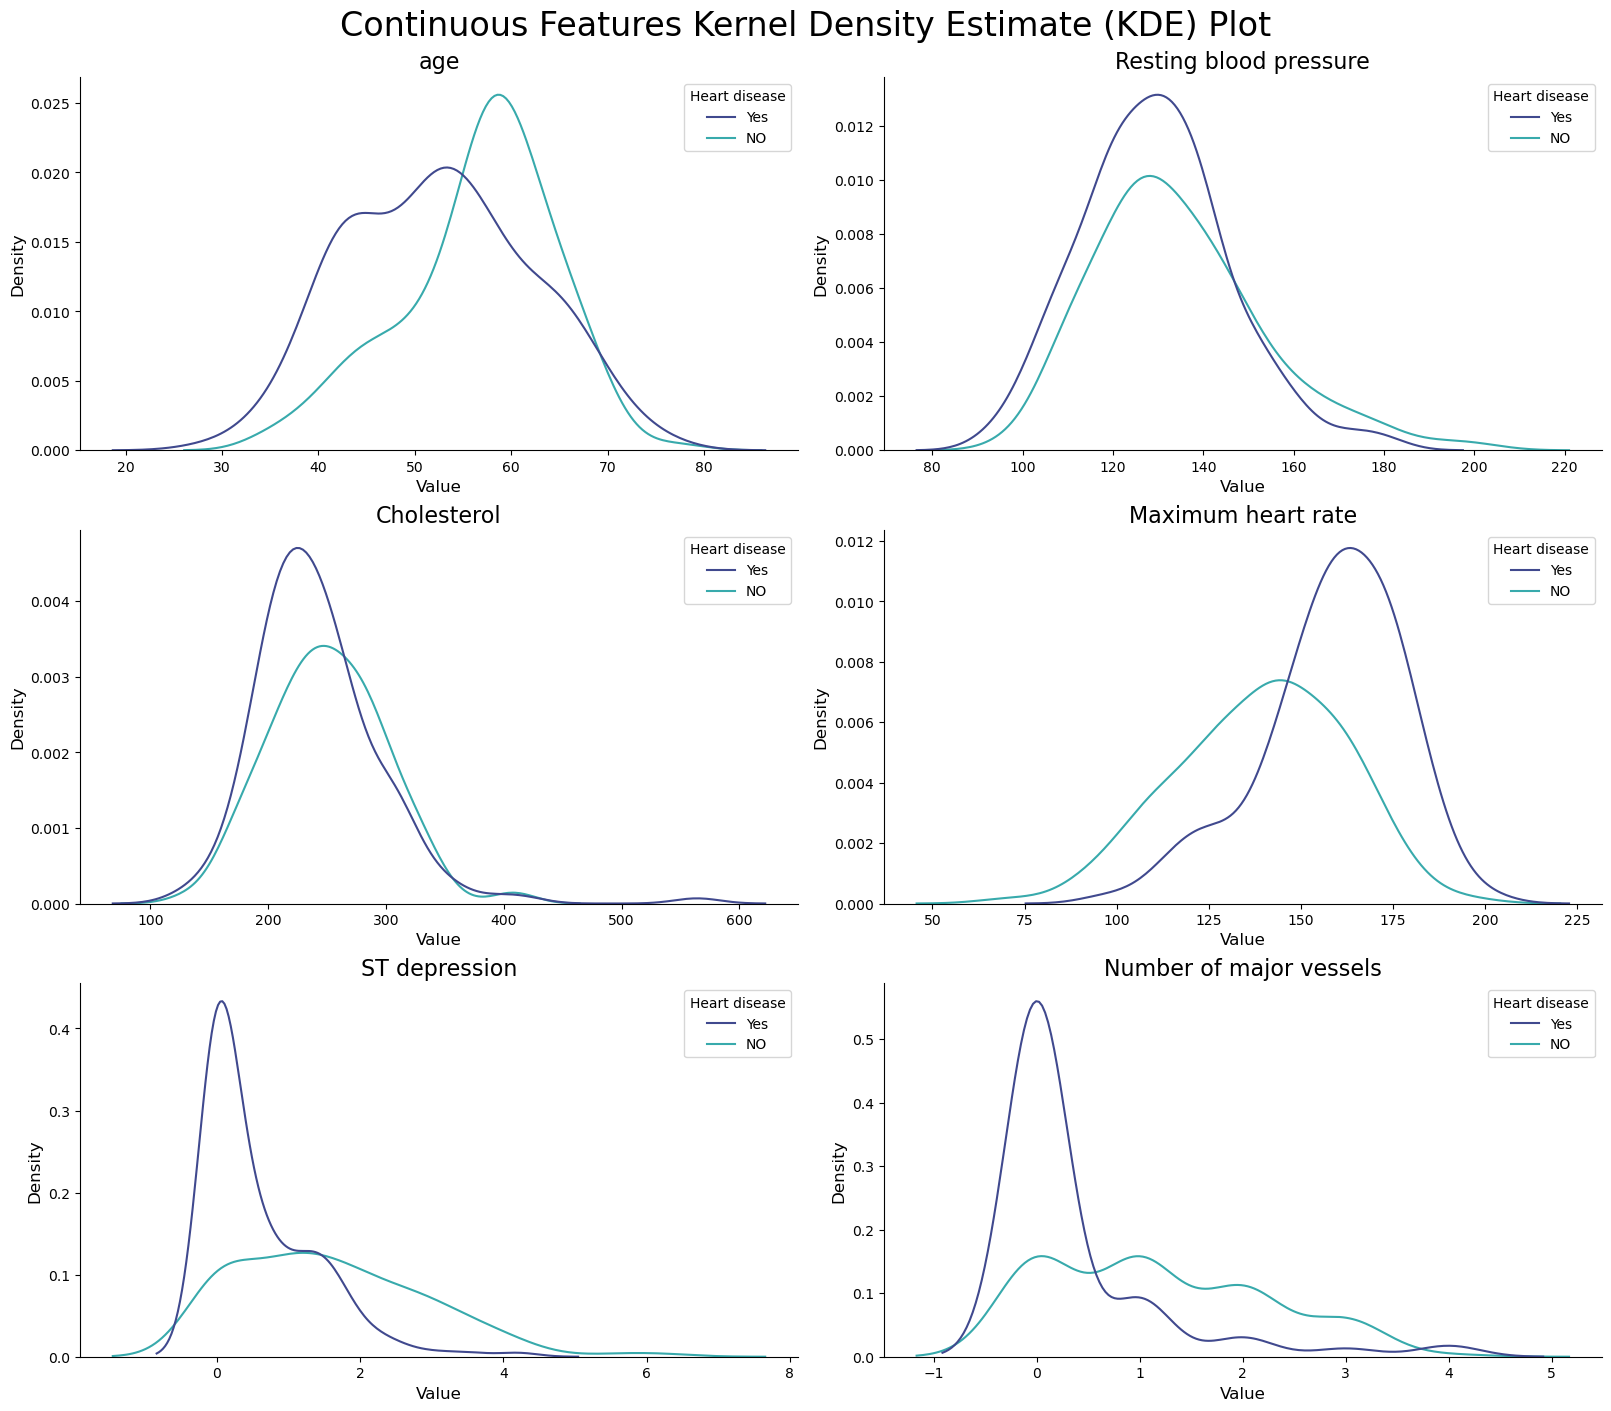

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualizing continuous features distribution with a different color palette
L = len(numerical_features)
ncol = 2
nrow = int(np.ceil(L / ncol))

# Create the figure and axes
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14), constrained_layout=True)
axes = axes.flatten()

# Plot each feature
for idx, col in enumerate(numerical_features):
    sns.kdeplot(
        data=df,
        x=col,
        hue="Heart disease",
        palette = "mako",
        ax=axes[idx]
    )
    axes[idx].set_title(col, fontsize=16)
    axes[idx].set_xlabel("Value", fontsize=12)
    axes[idx].set_ylabel("Density", fontsize=12)
    sns.despine(ax=axes[idx], right=True)
# Hide any unused axes
for idx in range(L, len(axes)):
    axes[idx].set_visible(False)

# Add a main title
fig.suptitle("Continuous Features Kernel Density Estimate (KDE) Plot", fontsize=24)

plt.show()


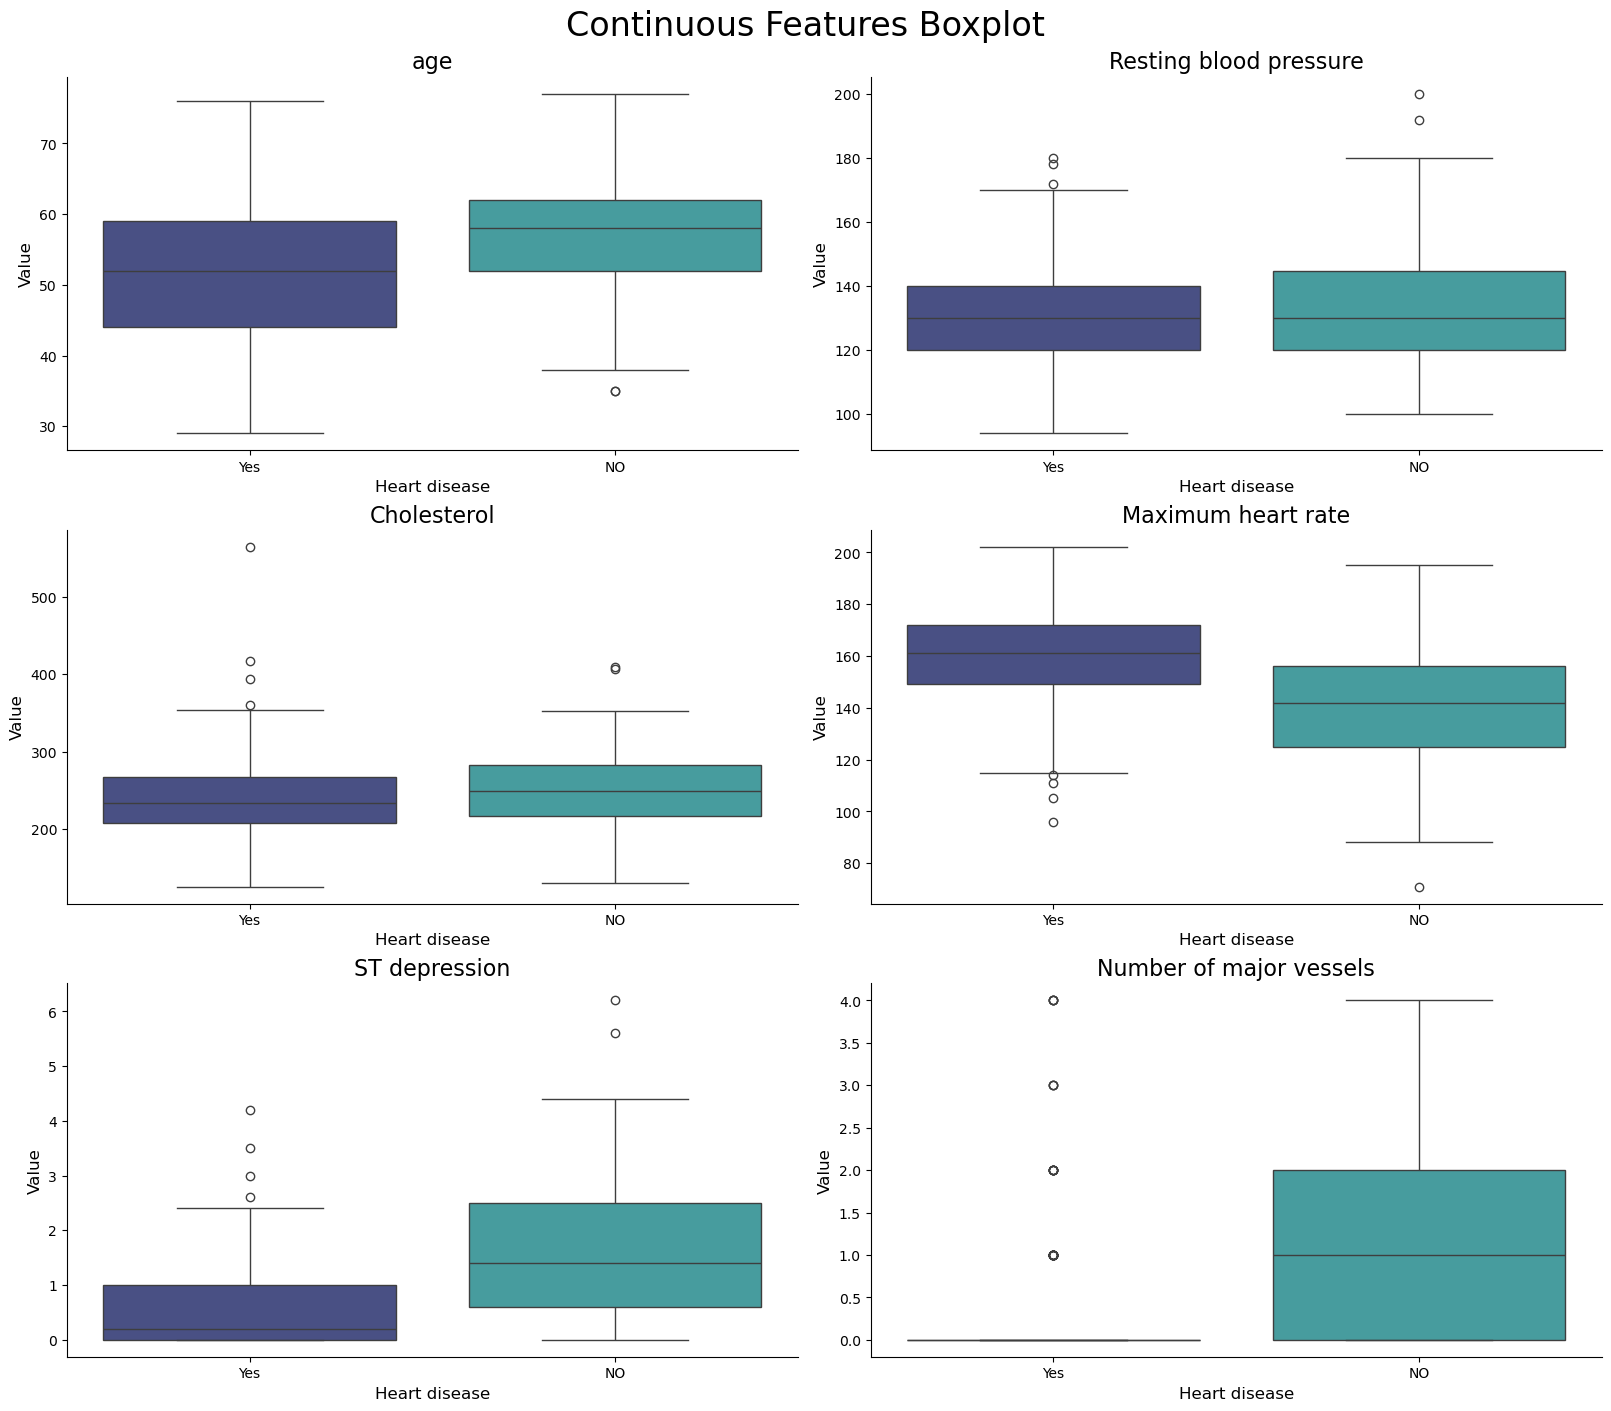

In [25]:
# Visualizing continuous features with boxplots and a custom color palette
L = len(numerical_features)
ncol = 2
nrow = int(np.ceil(L / ncol))

# Create the figure and axes
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14), constrained_layout=True)
axes = axes.flatten()

# Plot each feature
for idx, col in enumerate(numerical_features):
    sns.boxplot(
        data=df,
        x="Heart disease",
        y=col,
        palette="mako",  # Change the color palette here
        ax=axes[idx]
    )
    axes[idx].set_title(col, fontsize=16)
    axes[idx].set_xlabel("Heart disease", fontsize=12)
    axes[idx].set_ylabel("Value", fontsize=12)
    sns.despine(ax=axes[idx], right=True)

# Hide any unused axes
for idx in range(L, len(axes)):
    axes[idx].set_visible(False)

# Add a main title
fig.suptitle("Continuous Features Boxplot", fontsize=24)

plt.show()

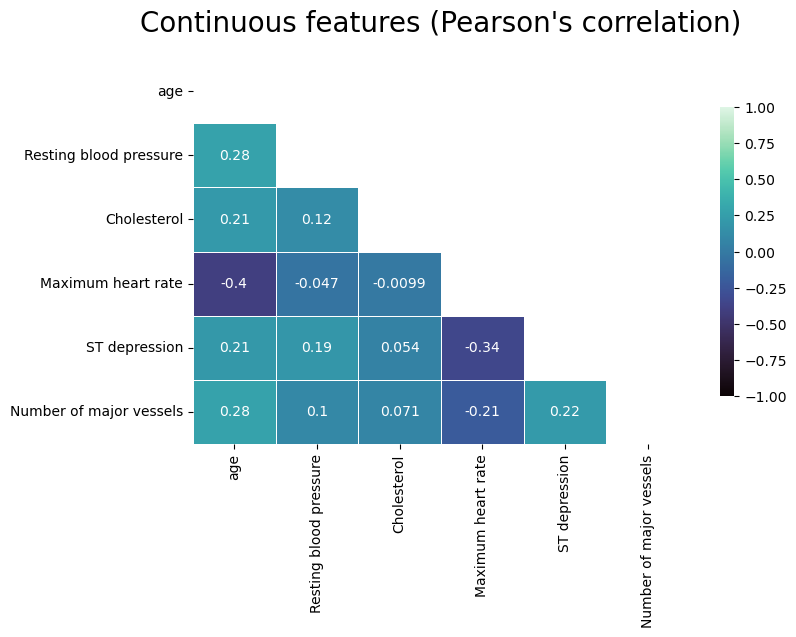

In [27]:
# pearson's correlation
num_df= df [numerical_features]
corr = num_df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(palette='mako', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Continuous features (Pearson's correlation)", fontsize=20, y= 1.05);

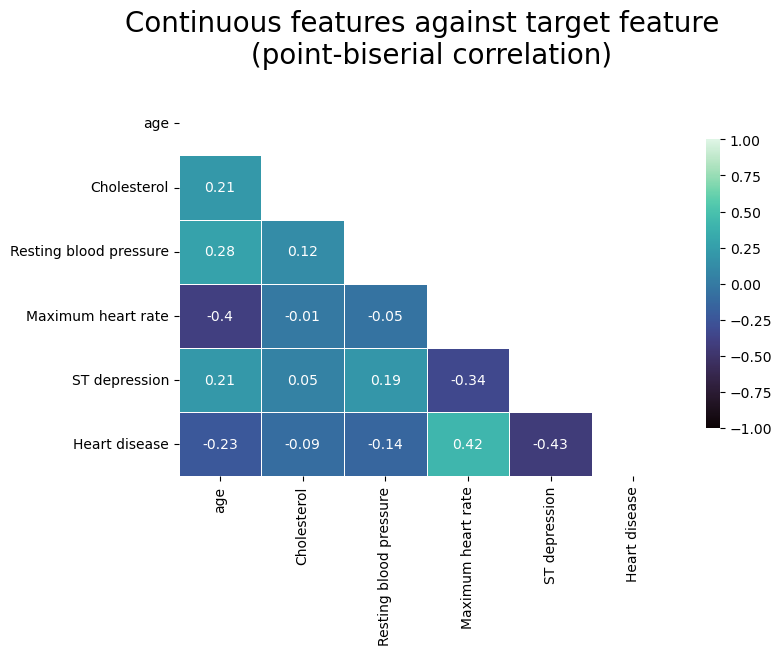

In [30]:
from scipy import stats

# point_biserial correlation
num_target= ['age', 'Cholesterol', 'Resting blood pressure', 'Maximum heart rate','ST depression', 'Heart disease']
df['Heart disease'][df['Heart disease'] == 'NO'] = 0
df['Heart disease'][df['Heart disease'] == 'Yes'] = 1

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in num_target:
    col = []
    for y in num_target :
        pbs =point_biserial(df[x], df[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = df[num_target].columns, index =df[num_target].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(palette='mako', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Continuous features against target feature \n (point-biserial correlation)", fontsize=20, y= 1.05);

* This plot uses the point-biserial correlation to evaluate the linear relationship between continuous features and a binary target variable, Heart disease, and visualizes the results in a heatmap.

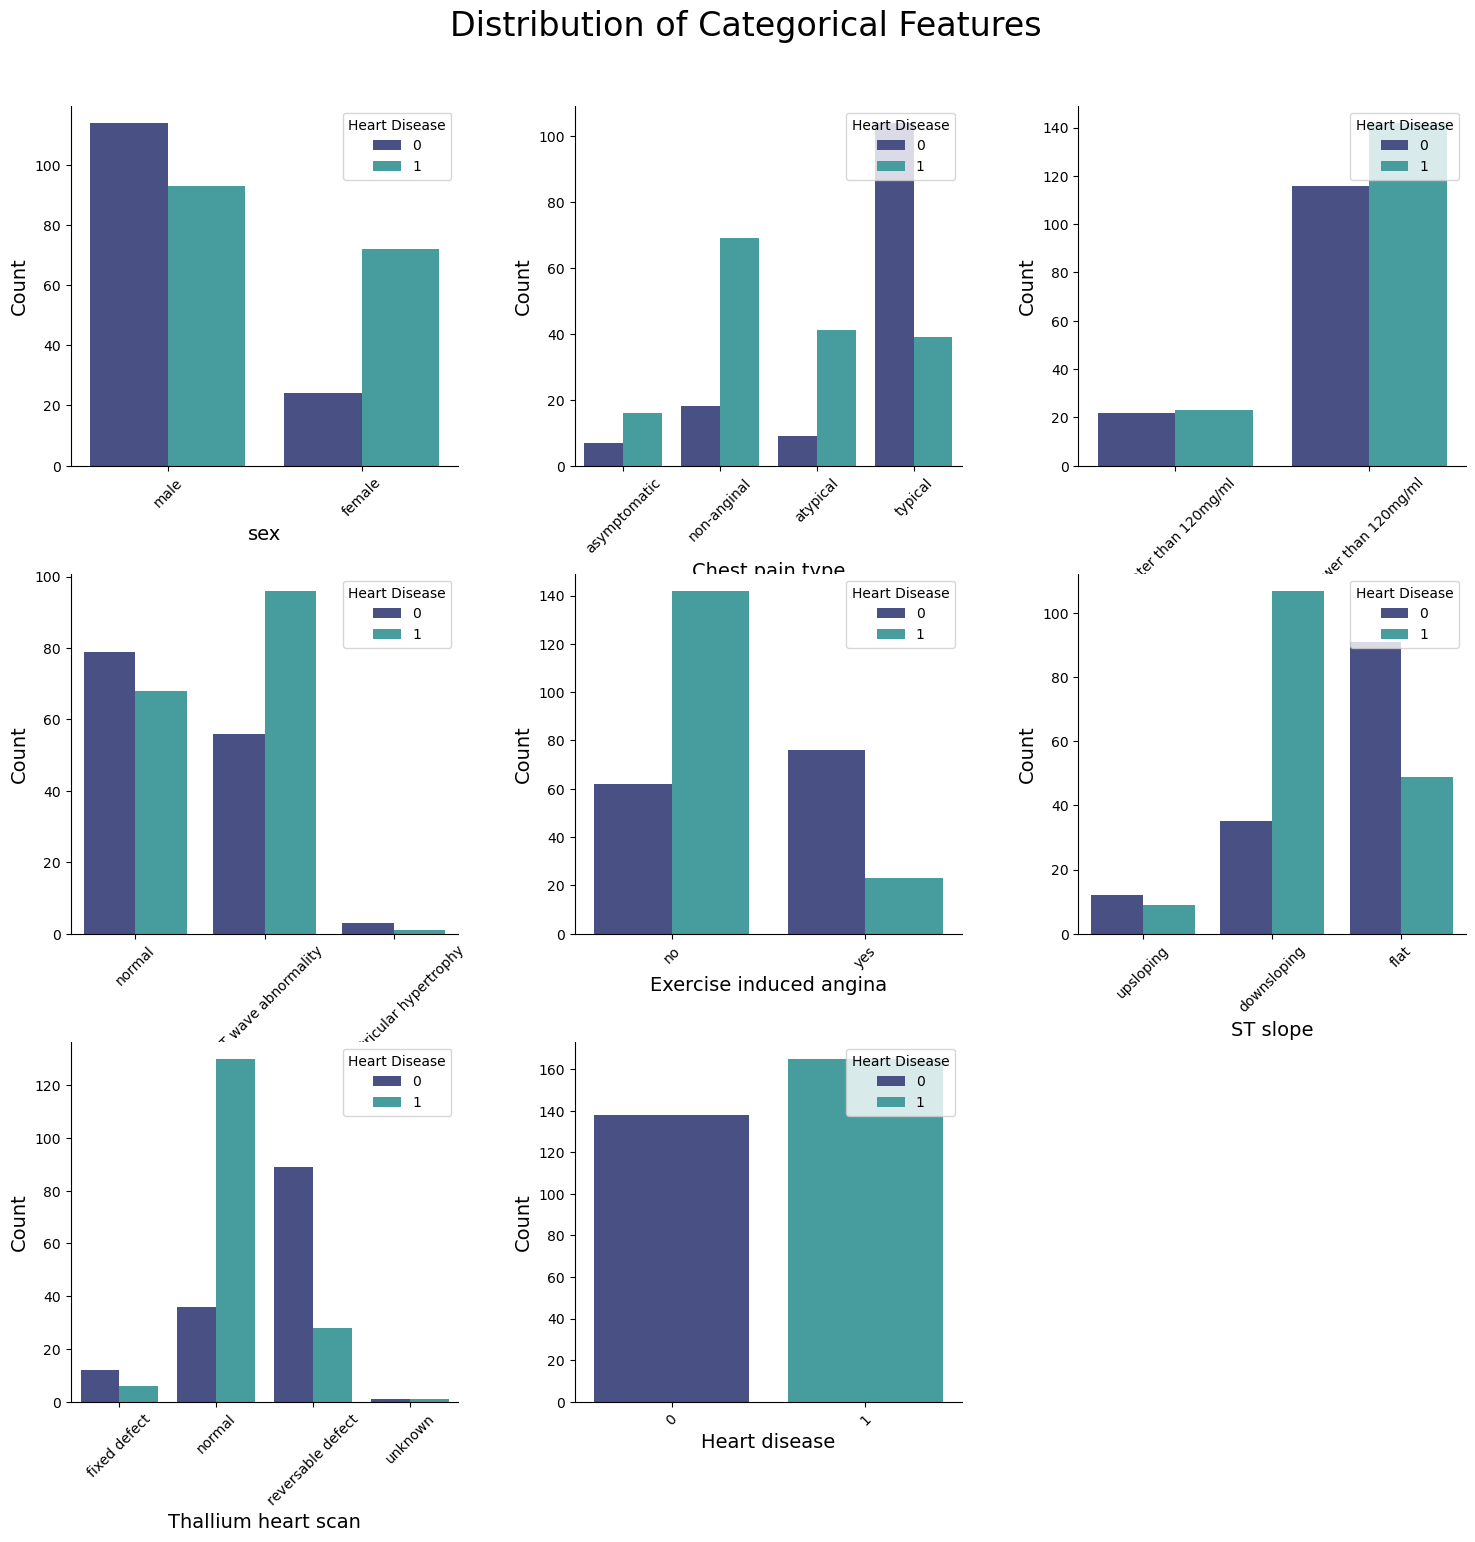

In [32]:
def hist_plot(data, categorical_features):    
    # Determine the layout of the subplots
    L = len(categorical_features)
    ncol = 3
    nrow = int(np.ceil(L / ncol))
    remove_last = (nrow * ncol) - L  # Calculate the number of extra subplots
    
    # Create the figure and axes
    fig, ax = plt.subplots(nrow, ncol, figsize=(18, 16))    
    fig.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)

    # Flatten the axes array for easy iteration
    ax = ax.flatten()
    
    # Plot each categorical feature
    for i, col in enumerate(categorical_features):
        sns.countplot(data=data, x=col, hue="Heart disease", palette='mako', ax=ax[i])
        ax[i].set_xlabel(col, fontsize=14)
        ax[i].set_ylabel("Count", fontsize=14)
        ax[i].tick_params(axis='x', rotation=45)
        ax[i].legend(title='Heart Disease', loc='upper right', fontsize=10)
        sns.despine(ax=ax[i])

    # Hide extra subplots if the number of features is less than available axes
    for j in range(L, len(ax)):
        ax[j].set_visible(False)

    # Set the main title
    fig.suptitle('Distribution of Categorical Features', fontsize=24, y=0.98)
    plt.show()

# Call the improved function
hist_plot(df, categorical_features)


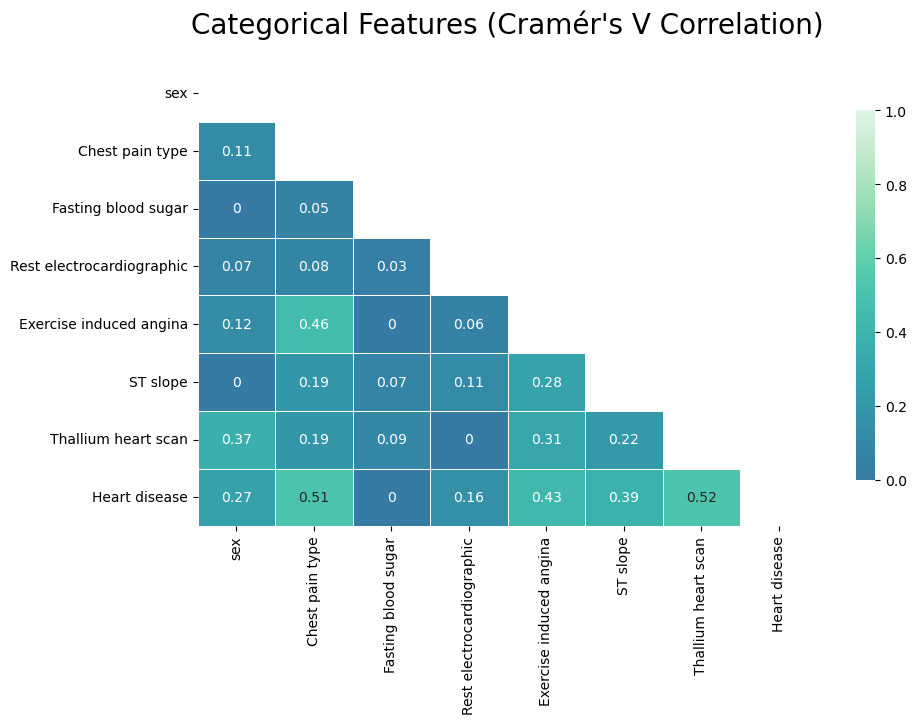

In [33]:
# Function to compute Cramér's V correlation
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate the correlation coefficients
def compute_cramers_v_matrix(data, categorical_features):
    rows = []
    cat_df = data[categorical_features]
    for x in cat_df:
        col = []
        for y in cat_df:
            cramers = cramers_v(cat_df[x], cat_df[y])
            col.append(round(cramers, 2))
        rows.append(col)
    return pd.DataFrame(rows, columns=cat_df.columns, index=cat_df.columns)

# Compute the Cramér's V matrix
cramers_results = compute_cramers_v_matrix(df, categorical_features)

# Plot the heatmap
def plot_cramers_v_heatmap(df, title="Categorical Features (Cramér's V Correlation)"):
    mask = np.triu(np.ones_like(df, dtype=bool))
    corr = df.mask(mask)
    plt.figure(figsize=(10, 6))
    cmap = sns.color_palette(palette='mako', as_cmap=True)
    sns.heatmap(
        corr, 
        mask=mask, 
        cmap=cmap, 
        vmax=1.0, 
        vmin=0, 
        center=0, 
        annot=True,
        square=False, 
        linewidths=0.5, 
        cbar_kws={"shrink": 0.8}
    )
    plt.title(title, fontsize=20, y=1.05)
    plt.show()

# Plot the heatmap for the Cramér's V correlation matrix
plot_cramers_v_heatmap(cramers_results)


* Cramér's V measures the strength of association between two categorical variables. The values range from 0 (no association) to 1 (perfect association).